# Importing Library

In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Define the X,y dataset

In [16]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=np.float32)
y = np.array([
    [0],
    [1],
    [1],
    [0]
], dtype=np.float32)

In [17]:
print(X)
print(y)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
[[0.]
 [1.]
 [1.]
 [0.]]


# Build the Neural Network Model, A small feedforward neural network with one hidden layer

In [18]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),  # Input layer with 2 features
    keras.layers.Dense(units=4, activation='relu', name='hidden_layer_1'), # Hidden layer with 4 neurons and ReLU activation
    keras.layers.Dense(units=1, activation='sigmoid', name='output_layer') # Output layer with 1 neuron and Sigmoid activation for binary classification
])

# Display the model summary

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [20]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', # Appropriate for binary classification
    metrics=['accuracy']
)

# Train the Model

In [21]:
history = model.fit(X, y, epochs=100, verbose=0)

# Evaluate the Model

In [22]:
predictions = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


# Convert probabilities to binary output (0 or 1)

In [23]:
binary_predictions = (predictions > 0.5).astype(int)

In [24]:
for i in range(len(X)):
    print(f"{X[i]} | {y[i][0]} | {predictions[i][0]:<20.4f}| {binary_predictions[i][0]}")


[0. 0.] | 0.0 | 0.5233              | 1
[0. 1.] | 1.0 | 0.3699              | 0
[1. 0.] | 1.0 | 0.2758              | 0
[1. 1.] | 0.0 | 0.1448              | 0


# Optionally, print the final accuracy

In [26]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"\nFinal Model Accuracy: {accuracy*100:.2f}%")


Final Model Accuracy: 25.00%


# Plot Loss

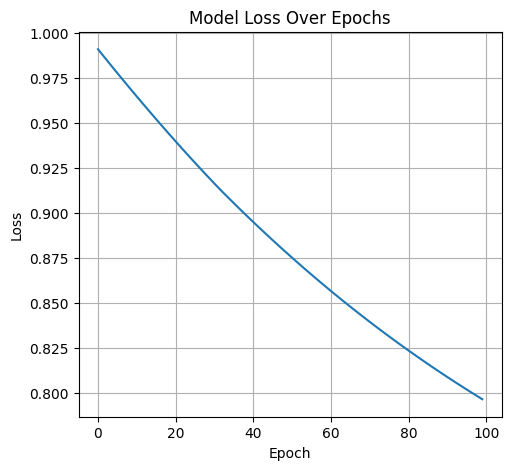

In [31]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)


# Plot Accuracy

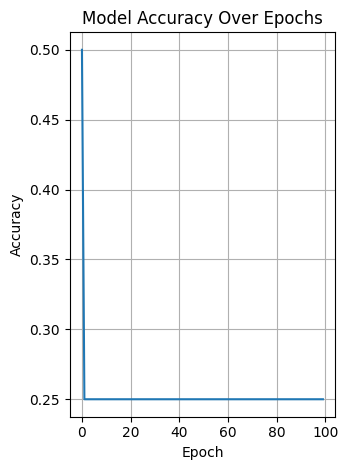

In [32]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

# Define a grid of points to evaluate the model on, We'll create a meshgrid covering the input space [0,1]x[0,1]

In [33]:
x_min, x_max = -0.5, 1.5 # Extend range slightly beyond 0 and 1
y_min, y_max = -0.5, 1.5
h = 0.01

# Step size in the mesh

In [34]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict probabilities for each point in the meshgrid

In [35]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step


# Plot the decision boundary

# Plot the training data points
# Separate points by class

In [37]:
X_class_0 = X[y.flatten() == 0]
X_class_1 = X[y.flatten() == 1]

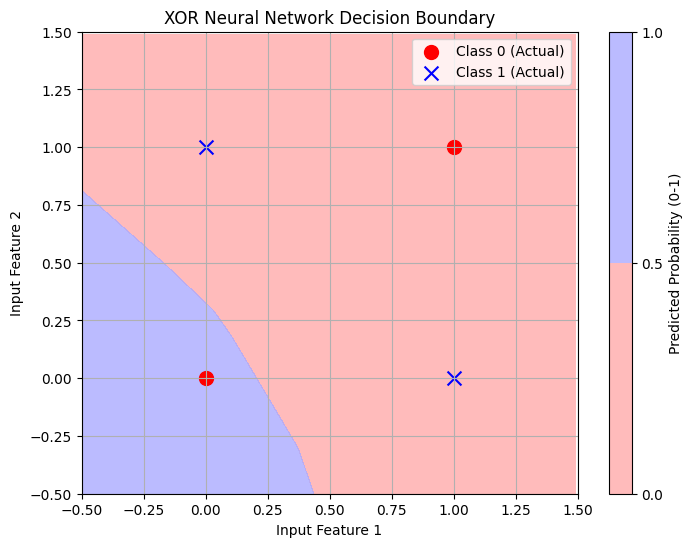

In [41]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['#FFAAAA', '#AAAAFF'], alpha=0.8)
plt.colorbar(label='Predicted Probability (0-1)')
plt.scatter(X_class_0[:, 0], X_class_0[:, 1], c='red', marker='o', s=100, label='Class 0 (Actual)')
plt.scatter(X_class_1[:, 0], X_class_1[:, 1], c='blue', marker='x', s=100, label='Class 1 (Actual)')
plt.title('XOR Neural Network Decision Boundary')
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.grid(True)
plt.show()
